# **Pure $\lambda$-Calculus**

[The deatailed script](https://www.mathcha.io/editor/Pvvz5UZ1t7ktL6sZJYp19sZnX9vVserJMEKhJvvMx7)

## **Variables**

The code below models variables.

Using the `natgen()` generator in this code ensures that a fresh variable is returned in response to each constructor call.

## Import dependencies

In [1]:
import random
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from deap import tools, base, creator
import seaborn as sns

sys.path.append('../')
from calculus.term import *
from calculus.strategy import *
from calculus.generation import gen_filtered_lambda_terms

from calculus_utils.drawing import *
from calculus_utils.algorithms import *

from vd_env.lambda_env import LambdaEnv
from vd_env.run_greedy_policy import run_greedy_policy
from vd_env.run_e_greedy_policy import run_e_greedy_policy

In [2]:
UPLIMIT = 60
DOWNLIMIT = 50
LAMBDA_TERM_COUNT = 100
RANDOM_AVERAGE_COUNT = 20

terms, stepsLO = gen_filtered_lambda_terms(
    count_terms=LAMBDA_TERM_COUNT, down_vertices_limit=DOWNLIMIT,
    up_vertices_limit=UPLIMIT)

countVertices = list(map(lambda term: term.verticesNumber, terms))
countRedexes = list(map(lambda term: len(term.redexes), terms))

print(f"number of lambda terms {len(terms)}")
print("number of vertices= {}".format(countVertices))
print("number of redexes= {}".format(countRedexes))

print("number of steps to normalize using LO strategy= {}".format(stepsLO))
print(f'number of terms with normal form {len(terms)}')

print("number of steps to normalize using LO strategy= {}".format(stepsLO))

stepsRI = [term.normalize(RightmostInnermostStrategy())[1] for term in terms]
print("number of steps to normalize using RI strategy= {}".format(stepsRI))

stepsRand = [sum([term.normalize(RandomStrategy())[1] for i in range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT for
             term in terms]
print("number of steps to normalize using Random strategy= {}".format(stepsRand))

Generated terms: 239
LO strategy applying
Remove unormalized terms
Left 100 normalizeble terms
number of lambda terms 100
number of vertices= [52, 56, 59, 56, 57, 53, 53, 56, 59, 51, 54, 54, 57, 56, 51, 55, 53, 58, 56, 51, 58, 53, 54, 51, 55, 58, 56, 53, 57, 58, 51, 58, 54, 53, 56, 57, 58, 53, 53, 58, 55, 59, 54, 55, 55, 59, 51, 58, 53, 51, 55, 54, 52, 55, 55, 55, 51, 56, 51, 56, 58, 58, 55, 53, 56, 55, 53, 59, 52, 54, 57, 51, 54, 51, 51, 53, 53, 56, 57, 57, 52, 58, 57, 56, 51, 59, 58, 54, 52, 53, 58, 55, 57, 52, 53, 58, 57, 55, 58, 56]
number of redexes= [1, 8, 8, 3, 4, 4, 6, 8, 5, 7, 8, 9, 7, 7, 4, 9, 8, 4, 2, 5, 7, 5, 4, 6, 4, 6, 6, 4, 4, 8, 5, 5, 5, 7, 5, 5, 6, 3, 10, 3, 4, 6, 7, 5, 5, 4, 4, 4, 4, 7, 5, 6, 3, 4, 5, 5, 2, 4, 4, 5, 5, 6, 7, 6, 6, 5, 5, 8, 5, 5, 7, 6, 7, 3, 5, 6, 4, 1, 3, 7, 4, 3, 4, 4, 7, 6, 3, 6, 6, 7, 5, 5, 5, 7, 6, 6, 4, 5, 5, 7]
number of steps to normalize using LO strategy= [1, 4, 7, 5, 5, 6, 91, 13, 2, 3, 5, 4, 47, 8, 6, 32, 18, 6, 2, 8, 6, 2, 2, 7, 3, 3, 4, 7

In [3]:
print('max cound LO: {}'.format(max(stepsLO)))
print('max cound RI: {}'.format(max(stepsRI)))
print('max cound Rand: {}'.format(max(stepsRand)))

max cound LO: 182
max cound RI: 31
max cound Rand: inf


In [4]:
max_count_steps_rlenv = 200
strategies_env = [LeftmostOutermostStrategy(),
                  RightmostInnermostStrategy()]

explore_actions = 100
epsilon = .1

In [5]:
lambda_env = LambdaEnv(strategies=strategies_env,
                       lambda_terms=terms,
                       max_step_term=max_count_steps_rlenv,
                       count_terms=LAMBDA_TERM_COUNT)

In [6]:
lambda_env, rewards_e_greedy = \
    run_e_greedy_policy(lambda_env,
                        exploration=explore_actions,
                        max_term_reward=max_count_steps_rlenv,
                        epsilon=epsilon,
                        deterministic=True,
                        is_action_based=True)

[-0.92156863 -0.88      ]
[-0.92156863 -0.88235294]
[-0.92156863 -0.88461538]
[-0.92156863 -0.88679245]
[-0.92156863 -0.88888889]
[-0.92156863 -0.87272727]
[-0.92156863 -0.875     ]
[-0.92156863 -0.87719298]
[-0.92156863 -0.87931034]
[-0.92156863 -0.88135593]
[-0.92156863 -0.88333333]
[-0.92156863 -0.8852459 ]
[-0.92156863 -0.88709677]
[-0.92156863 -0.88888889]
[-0.92156863 -0.890625  ]
[-0.92156863 -0.89230769]
[-0.92156863 -0.89393939]
[-0.92156863 -0.89552239]
[-0.92156863 -0.89705882]
[-0.92156863 -0.89855072]
[-0.92156863 -0.88571429]
[-0.92156863 -0.88732394]
[-0.92156863 -0.88888889]
[-0.92156863 -0.89041096]
[-0.92156863 -0.89189189]
[-0.92156863 -0.89333333]
[-0.92156863 -0.89473684]
[-0.92156863 -0.8961039 ]
[-0.92156863 -0.8974359 ]
[-0.92156863 -0.89873418]
[-0.92156863 -0.9       ]
[-0.92156863 -0.90123457]
[-0.92156863 -0.90243902]
[-0.92156863 -0.90361446]
[-0.92156863 -0.9047619 ]
[-0.92156863 -0.90588235]
[-0.92307692 -0.90697674]
[-0.92307692 -0.90909091]
[-0.92307692

In [7]:
lambda_env.reset_soft()
lambda_env, rewards_e_greedy_non_d = \
    run_e_greedy_policy(lambda_env,
                        exploration=explore_actions,
                        max_term_reward=max_count_steps_rlenv,
                        epsilon=epsilon,
                        deterministic=False,
                        is_action_based=True)

[-0.92156863 -0.88      ]
[-0.92156863 -0.88235294]
[-0.92307692 -0.88235294]
[-0.9245283  -0.88235294]
[-0.9245283  -0.86538462]
[-0.92592593 -0.86538462]
[-0.92592593 -0.86792453]
[-0.92592593 -0.87037037]
[-0.92592593 -0.87272727]
[-0.92592593 -0.875     ]
[-0.92727273 -0.875     ]
[-0.92727273 -0.87719298]
[-0.92857143 -0.87719298]
[-0.92857143 -0.86440678]
[-0.92857143 -0.86666667]
[-0.92982456 -0.86885246]
[-0.93103448 -0.86885246]
[-0.93220339 -0.86885246]
[-0.93333333 -0.86885246]
[-0.93333333 -0.87301587]
[-0.93442623 -0.87301587]
[-0.93548387 -0.87301587]
[-0.93548387 -0.87692308]
[-0.93650794 -0.87692308]
[-0.9375     -0.87692308]
[-0.93846154 -0.87878788]
[-0.93846154 -0.88059701]
[-0.93846154 -0.88235294]
[-0.93939394 -0.88235294]
[-0.93939394 -0.88405797]
[-0.93939394 -0.88571429]
[-0.94029851 -0.88571429]
[-0.94029851 -0.88732394]
[-0.94117647 -0.88732394]
[-0.94117647 -0.88888889]
[-0.94202899 -0.88888889]
[-0.94202899 -0.89041096]
[-0.94202899 -0.89189189]
[-0.94202899

In [8]:
steps_e_greedy = [max_count_steps_rlenv - (rew + 1) for rew in rewards_e_greedy]
steps_e_greedy_non_d = [max_count_steps_rlenv - (rew + 1) for rew in rewards_e_greedy_non_d]

In [9]:
print("count steps to norm by e-Greedy policy = {}".format(steps_e_greedy))
print("count steps to norm by e-Greedy policy non det = {}".format(steps_e_greedy_non_d))

count steps to norm by e-Greedy policy = [1, 4, 10, 5, 5, 6, 34, 15, 2, 5, 8, 14, 22, 8, 6, 32, 16, 6, 2, 8, 14, 6, 6, 6, 8, 6, 6, 7, 5, 22, 8, 5, 5, 14, 8, 5, 8, 3, 16, 8, 8, 11, 9, 5, 5, 4, 18, 26, 18, 11, 14, 9, 25, 4, 5, 5, 14, 4, 5, 7, 5, 10, 7, 7, 10, 11, 6, 11, 5, 9, 8, 8, 8, 3, 6, 6, 4, 2, 4, 10, 8, 31, 4, 4, 14, 7, 15, 29, 4, 11, 5, 5, 12, 10, 14, 14, 5, 5, 7, 9]
count steps to norm by e-Greedy policy non det = [1, 4, 10, 5, 5, 6, 34, 15, 2, 5, 7, 8, 58, 8, 6, 32, 40, 6, 2, 8, 11, 2, 5, 8, 3, 4, 6, 7, 5, 9, 7, 5, 5, 13, 13, 7, 6, 3, 16, 8, 9, 20, 9, 5, 5, 4, 24, 25, 18, 5, 27, 9, 25, 4, 5, 4, 8, 4, 5, 7, 5, 15, 7, 5, 11, 15, 3, 12, 5, 9, 8, 9, 2, 3, 8, 6, 4, 2, 2, 3, 4, 58, 1, 4, 15, 8, 17, 46, 3, 16, 3, 1, 12, 7, 17, 14, 5, 5, 7, 9]


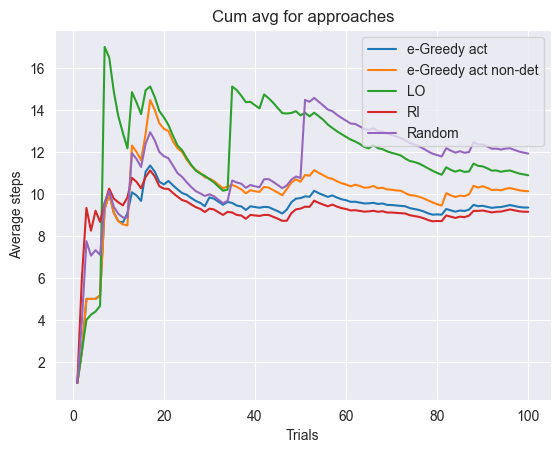

In [10]:
comp_data = {"e-Greedy act": (steps_e_greedy, "-"),
             "e-Greedy act non-det": (steps_e_greedy_non_d, "-"),
             "LO": (stepsLO, "-"),
             "RI": (stepsRI, "-"),
             "Random": ([step if step != np.inf else 200 for step in stepsRand], "-")}

draw_cumulative_avg_comparison(comp_data)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 28.87it/s]


number of not normalized terms: 0
          sumsquare_error         aic         bic  kl_div  ks_statistic  \
lognorm          0.610757  869.656978 -496.007052     inf      0.103794   
gamma            0.621981  865.879280 -494.186150     inf      0.131947   
rayleigh         0.644906  902.692668 -495.171774     inf      0.224230   
norm             0.665120  923.002442 -492.085403     inf      0.210575   
exponpow         0.679932  798.389994 -485.277815     inf      0.197095   

          ks_pvalue  
lognorm    0.216016  
gamma      0.055966  
rayleigh   0.000067  
norm       0.000228  
exponpow   0.000703  
{'lognorm': {'s': 0.6104518250882873, 'loc': -0.21418762792599438, 'scale': 7.891088558282213}}
Norm distribution: (9.35, 6.638335634780754)


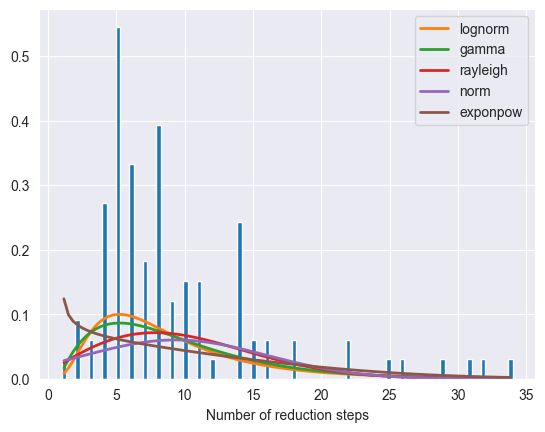

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 24.25it/s]

Log Norm distribution params: (2.0322387640957436, 0.6316574128653067); expected value = 9.316008903188958


In [12]:
draw_hist(steps_e_greedy)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 25.63it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.123652  1080.410115 -655.730096     inf      0.100254   
gamma            0.134963  1081.846420 -646.977231     inf      0.137312   
chi2             0.145261  1046.161623 -639.623804     inf      0.170721   
exponpow         0.150650   963.824646 -635.981003     inf      0.217482   
rayleigh         0.152434  1223.418302 -639.409259     inf      0.291506   

             ks_pvalue  
lognorm   2.501012e-01  
gamma     4.170030e-02  
chi2      5.113445e-03  
exponpow  1.241634e-04  
rayleigh  5.066643e-08  
{'lognorm': {'s': 0.8557784388644093, 'loc': 0.1937480056935801, 'scale': 6.784285670884218}}
Norm distribution: (10.13, 10.585513686165635)


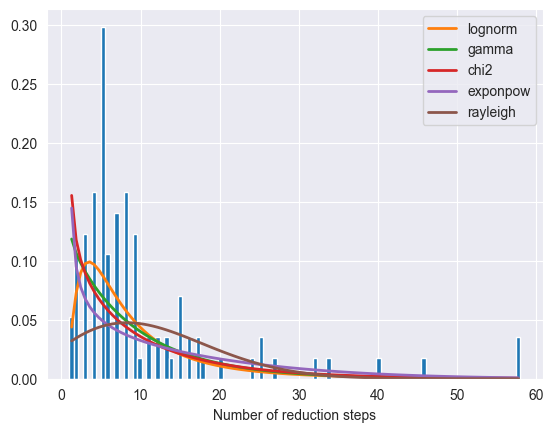

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 30.96it/s]

Log Norm distribution params: (1.9540884638613456, 0.8235294196029258); expected value = 9.906477304085255


In [13]:
draw_hist(steps_e_greedy_non_d)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 28.46it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.009172  1708.119850 -915.860480     inf      0.121446   
chi2             0.021610  1313.681897 -830.160993     inf      0.407199   
exponpow         0.023774  1239.741056 -820.618479     inf      0.341813   
rayleigh         0.031041  2922.747955 -798.550560     inf      0.379787   
gamma            0.033124  2774.259605 -787.450738     inf      0.786390   

             ks_pvalue  
lognorm   9.621647e-02  
chi2      1.684057e-15  
exponpow  6.209271e-11  
rayleigh  1.787303e-13  
gamma     2.764798e-66  
{'lognorm': {'s': 1.05808688052961, 'loc': 0.5453871759224, 'scale': 5.268537039286333}}
Norm distribution: (10.89, 21.025173007611617)


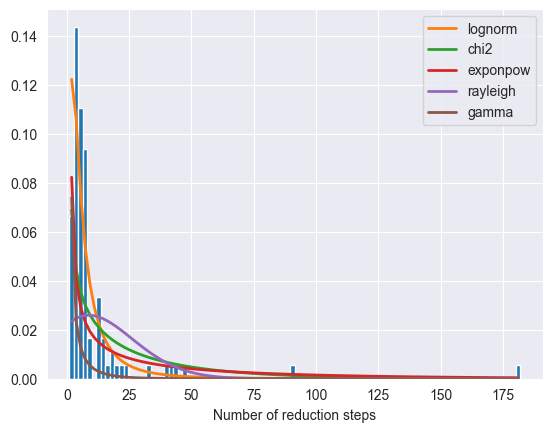

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 34.59it/s]

Log Norm distribution params: (1.8108038087663807, 0.9277771173342897); expected value = 9.404506586558812


In [14]:
draw_hist(stepsLO)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 25.64it/s]


number of not normalized terms: 0
          sumsquare_error         aic         bic  kl_div  ks_statistic  \
lognorm          0.734600  848.291820 -477.544368     inf      0.093606   
gamma            0.741790  850.348485 -476.570429     inf      0.112721   
rayleigh         0.757745  886.445887 -479.047561     inf      0.177719   
norm             0.777804  924.768463 -476.434691     inf      0.181860   
powerlaw         0.858349  705.299229 -461.975952     inf      0.289492   

             ks_pvalue  
lognorm   3.245007e-01  
gamma     1.458289e-01  
rayleigh  3.107279e-03  
norm      2.291950e-03  
powerlaw  6.468433e-08  
{'lognorm': {'s': 0.5041159557222974, 'loc': -0.8932667069826657, 'scale': 8.821701151857534}}
Norm distribution: (9.15, 5.564845011318824)


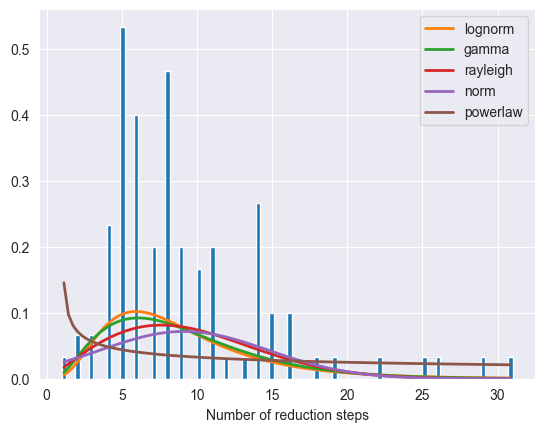

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 25.88it/s]

Log Norm distribution params: (2.0521932674158476, 0.5753110122425752); expected value = 9.18603731283647


In [15]:
draw_hist(stepsRI)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 26.75it/s]


number of not normalized terms: 1
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.037753  1063.982693 -765.522916     inf      0.100777   
rayleigh         0.076965  1191.121223 -699.602845     inf      0.276246   
exponpow         0.081451   998.488184 -689.398636     inf      0.175484   
norm             0.089464  1204.590847 -684.704719     inf      0.241829   
powerlaw         0.111944   844.317172 -657.917124     inf      0.305959   

             ks_pvalue  
lognorm   2.498343e-01  
rayleigh  3.601202e-07  
exponpow  3.884871e-03  
norm      1.396997e-05  
powerlaw  1.006882e-08  
{'lognorm': {'s': 0.7784183632739295, 'loc': 0.4238845157256429, 'scale': 6.913800426046649}}
Norm distribution: (10.022222222222222, 9.597643392942457)


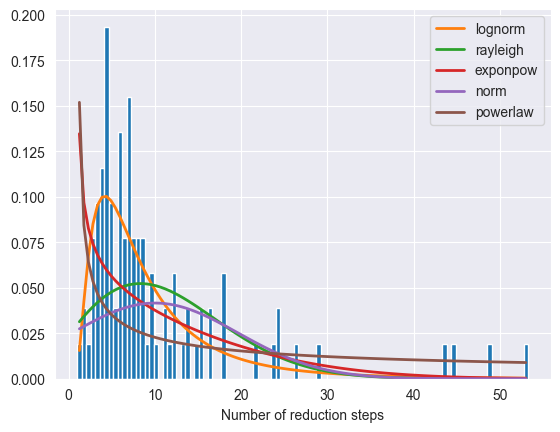

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 35.55it/s]

Log Norm distribution params: (2.010390218353626, 0.724557285126096); expected value = 9.707335609195301


In [16]:
draw_hist(stepsRand)